In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/train.csv')

In [ ]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data = np.array(df)
m, n = data.shape
np.random.shuffle(data)

# data_dev = data[0:1000].T
# Y_dev = data_dev[0]
# X_dev = data_dev[1:n]
# X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [ ]:
data_train.shape

(785, 41000)

In [ ]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [ ]:
W1, b1, W2, b2 = init_params()

In [ ]:
W2.shape

(10, 10)

In [ ]:
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_propogation(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [ ]:
W1, b1, W2, b2 = init_params()
Z1, A1, Z2, A2 =forward_propogation(W1, b1, W2, b2, X_train)

In [ ]:
def derivative_Relu(Z):
    return Z > 0

def one_hot_encoding(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def back_propogation(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot_encoding(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * derivative_Relu(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [ ]:
one_hot_Y = np.zeros((Y_train.size, Y_train.max() + 1))
one_hot_Y[np.arange(Y_train.size), Y_train] = 1
one_hot_Y = one_hot_Y.T
one_hot_Y

array([[1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [ ]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [ ]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_propogation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_propogation(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [ ]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.2)

Iteration:  0
[4 5 5 ... 7 4 4] [0 0 9 ... 5 8 3]
0.11178048780487805
Iteration:  10
[0 3 6 ... 3 3 3] [0 0 9 ... 5 8 3]
0.18885365853658537
Iteration:  20
[0 0 6 ... 3 3 3] [0 0 9 ... 5 8 3]
0.23570731707317072
Iteration:  30
[0 0 4 ... 3 3 3] [0 0 9 ... 5 8 3]
0.29860975609756096
Iteration:  40
[0 0 6 ... 3 6 4] [0 0 9 ... 5 8 3]
0.36309756097560975
Iteration:  50
[0 0 6 ... 3 5 4] [0 0 9 ... 5 8 3]
0.499609756097561
Iteration:  60
[0 0 6 ... 3 5 4] [0 0 9 ... 5 8 3]
0.5554146341463415
Iteration:  70
[0 0 6 ... 3 5 3] [0 0 9 ... 5 8 3]
0.595609756097561
Iteration:  80
[0 0 6 ... 3 5 3] [0 0 9 ... 5 8 3]
0.6307317073170732
Iteration:  90
[0 0 6 ... 8 5 3] [0 0 9 ... 5 8 3]
0.6617804878048781
Iteration:  100
[0 0 6 ... 8 5 3] [0 0 9 ... 5 8 3]
0.6907317073170731
Iteration:  110
[0 0 6 ... 8 3 3] [0 0 9 ... 5 8 3]
0.717170731707317
Iteration:  120
[0 0 6 ... 8 3 3] [0 0 9 ... 5 8 3]
0.7342682926829268
Iteration:  130
[0 0 6 ... 5 3 3] [0 0 9 ... 5 8 3]
0.7027073170731707
Iteration:  140

In [ ]:
import matplotlib.pyplot as plt

def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propogation(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image)
    plt.show()

Prediction:  [6]
Label:  6


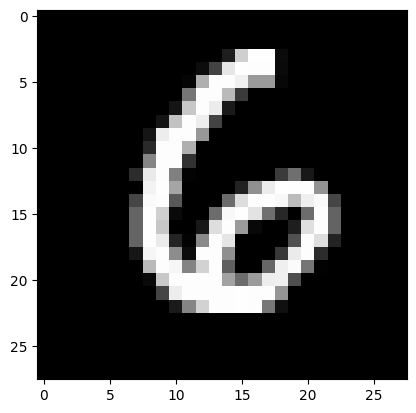

Prediction:  [0]
Label:  0


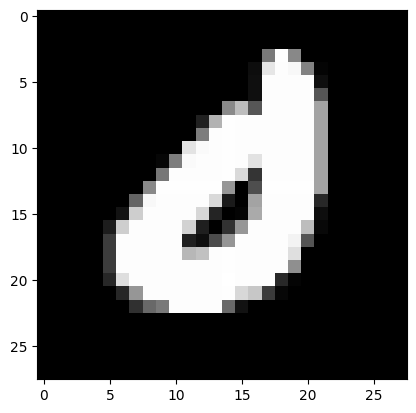

Prediction:  [2]
Label:  2


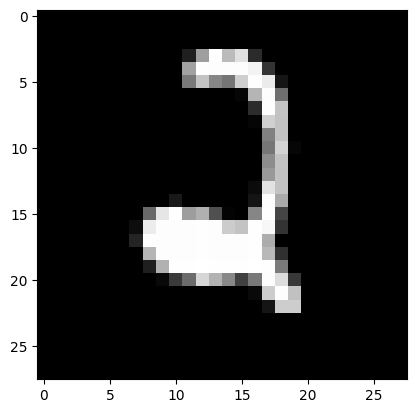

Prediction:  [4]
Label:  7


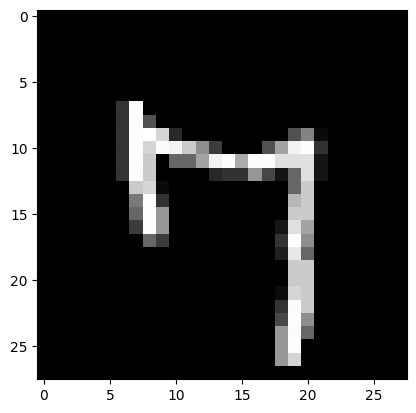

In [ ]:
test_prediction(7, W1, b1, W2, b2)
test_prediction(80, W1, b1, W2, b2)
test_prediction(45, W1, b1, W2, b2)
test_prediction(93, W1, b1, W2, b2)
